# Módulo 07

#### 1) Carregue a base e garanta que a base está como deveria.

Considerando a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separando 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
#importando dados
pagadores  =  pd.read_csv('demo01_tratado.csv')
df = pd.DataFrame(pagadores)
df.columns

Index(['Unnamed: 0', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Higher education', 'educacao_Incomplete higher',
       'educacao_Lower secondary', 'educacao_Secondary / secondary special',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [11]:
df

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,1,0,54.109589,9.884932,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,16646,1,0,1,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [13]:
# verificando dados faltantes
df.isna().sum()

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated          

In [21]:
# apagando coluna sem nome
df = df.drop(df.columns[0],axis=1)
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau',
       'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [24]:
# selecionando a variável target
y = df['mau']

In [25]:
#selecionando as variáveis explicativas
X = df.drop('mau',axis=1)

In [27]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: mau, dtype: int64

In [29]:
X.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [46]:
# separando os dados de treino e teste com percentual de 30% para dados de teste e 70% para treino
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3,random_state=100)

#### 2) Vamos para o modelo:

1. Definindo um objeto com a função da árvore de decisão vista em aula.
2. Treinando o modelo com os dados que você separou para treinamento.
3. Visualizando a árvore. Talvez você queira aumentar um pouco a figura.
4. Produzindo uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calculando a acurácia na base de treinamento

In [47]:
# definindo o objeto
clf = DecisionTreeClassifier(random_state=100)

In [48]:
#treinando o modelo
clf = clf.fit(X_train,y_train)

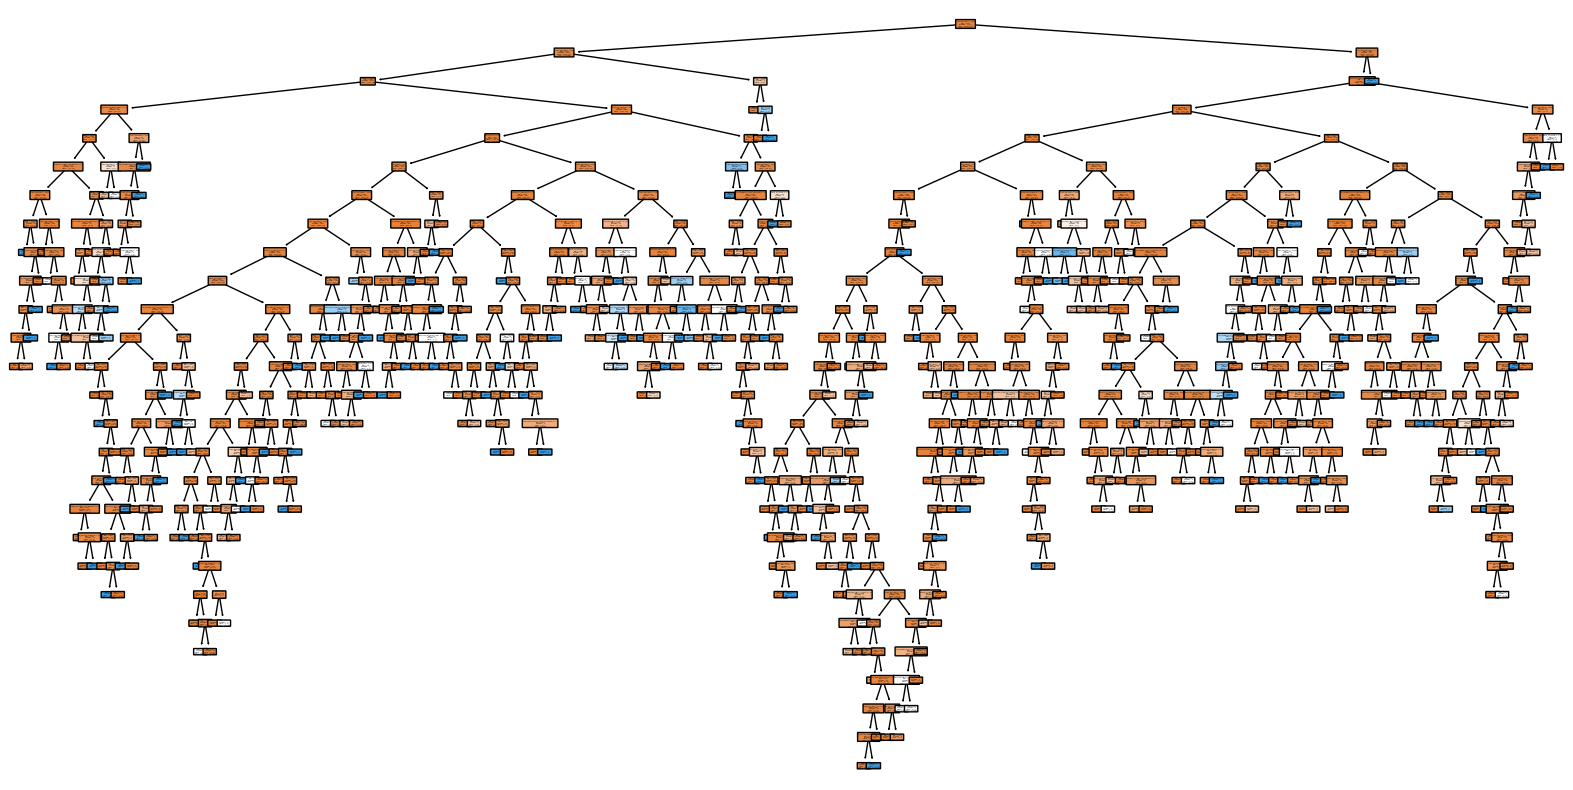

In [49]:
# visualizando a árvore
plt.figure(figsize=[20,10])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Aprovado','Reprovado'],
          feature_names=X_train.columns);

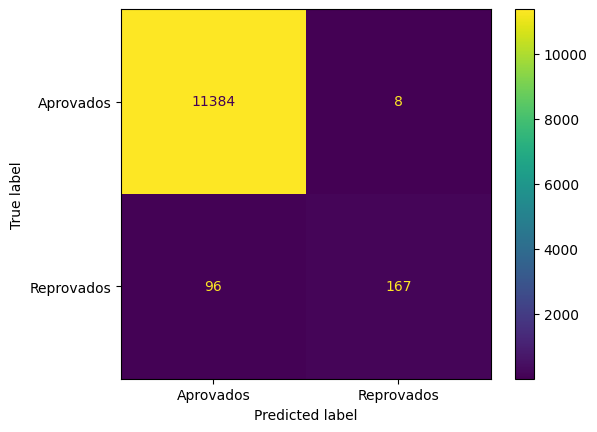

In [50]:
#realizando matrix de confuzão para visualização dos resultados.
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados','Reprovados'])
disp.plot()


In [51]:
# verificando a acurácia
prediction = clf.predict(X_train)

In [52]:
accuracy_score(y_train,prediction)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classificando a base de teste de acordo com a árvore que você treinou no item 2.
2. Produzindo a visualização da matriz de confusão para a base de teste.
3. Calculando a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treinando uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

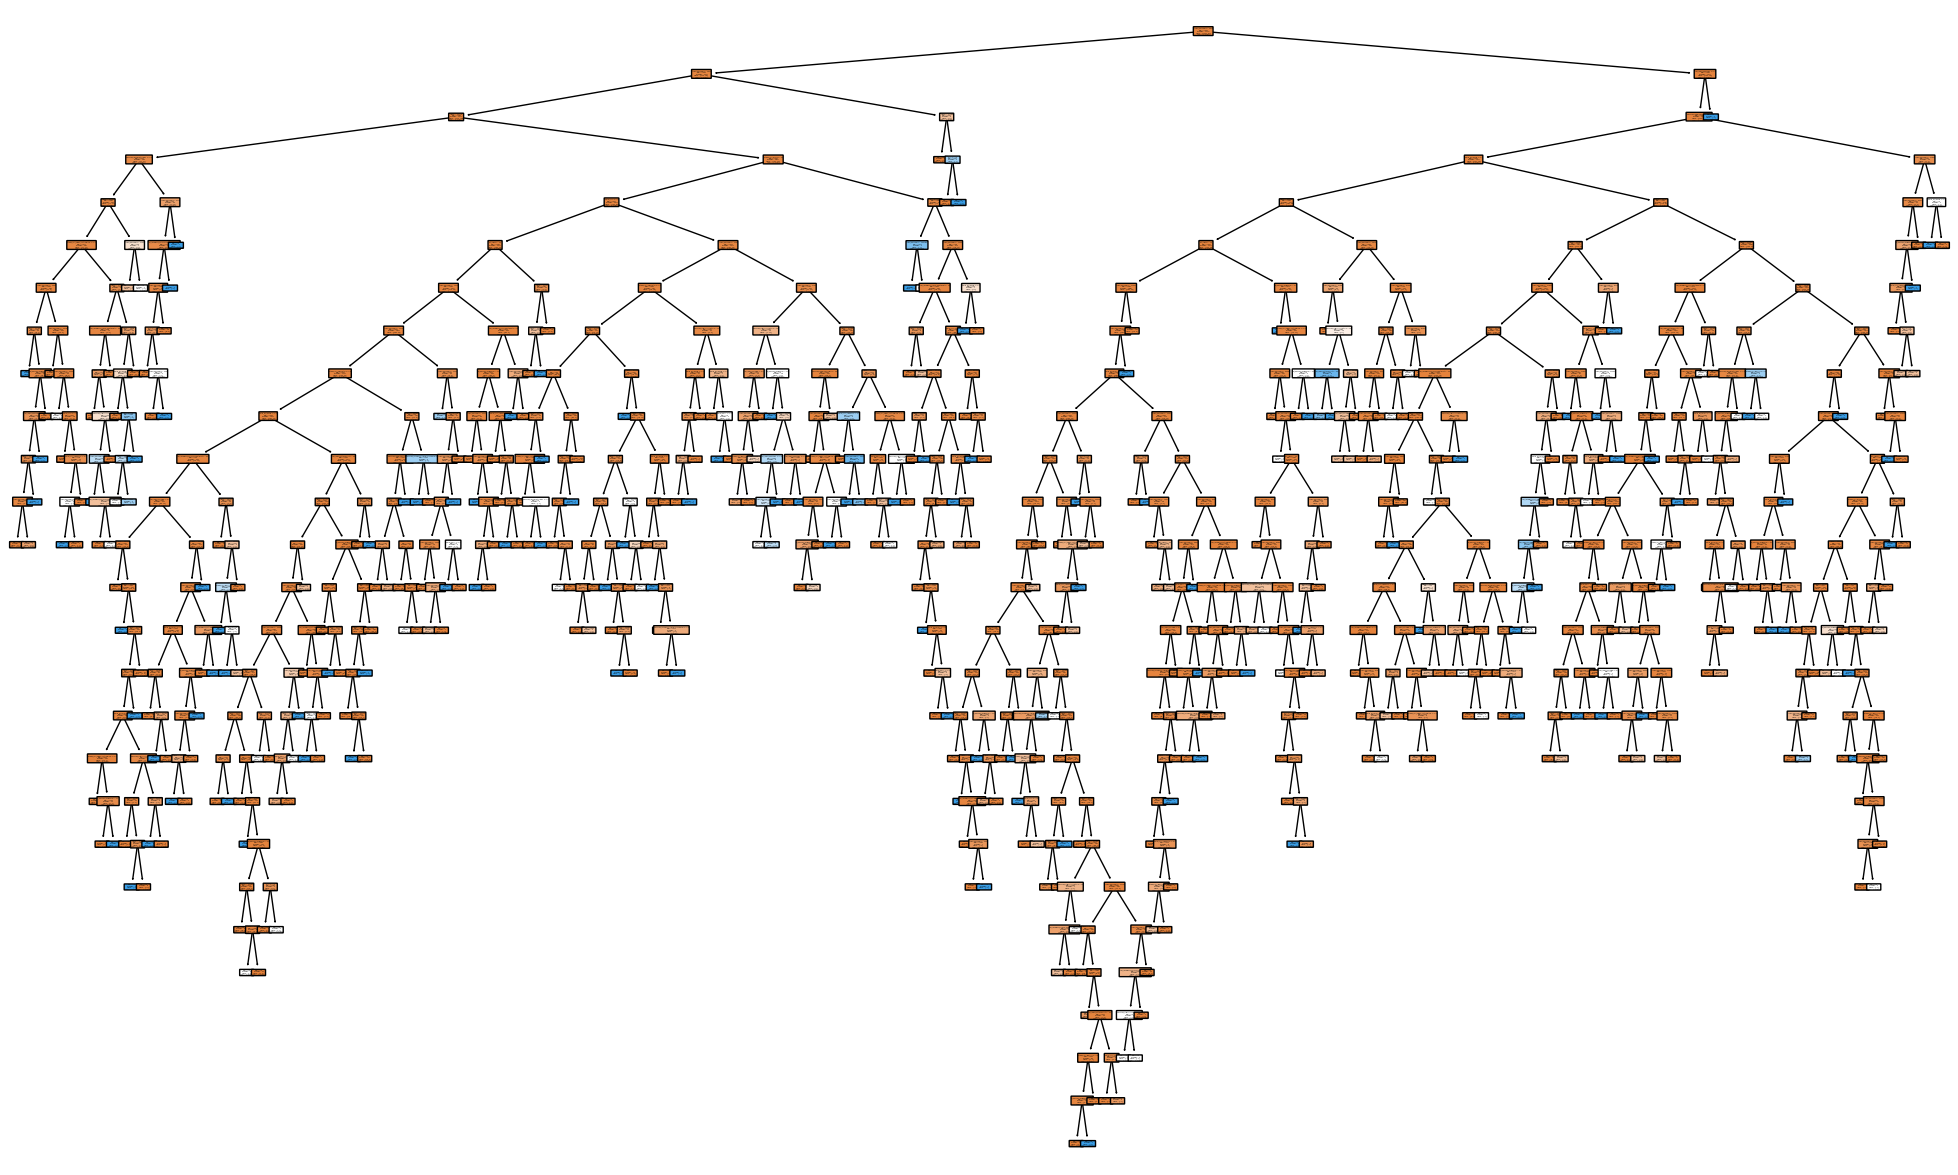

In [53]:
plt.figure(figsize=[25,15])
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Aprovados','Reprovados'],
          feature_names=X_test.columns);

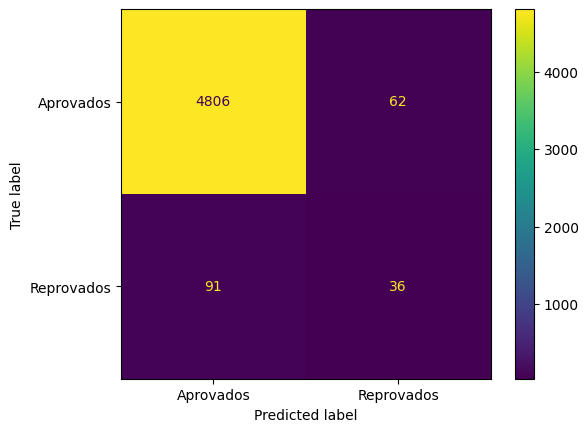

In [54]:
#realizando matrix de confuzão para visualização dos resultados.
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados','Reprovados'])
disp.plot()

In [55]:
#verificando acurácia dos dados de teste.
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

0.9693693693693693

In [56]:
#realizando nova árvore mais podada / primeiro limitando a profundidade e com min de exeplos de 5
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)


[Text(0.5458579881656804, 0.9545454545454546, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovados'),
 Text(0.2515717455621302, 0.8636363636363636, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Aprovados'),
 Text(0.24565458579881658, 0.7727272727272727, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Aprovados'),
 Text(0.10281065088757396, 0.6818181818181818, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Aprovados'),
 Text(0.0695266272189349, 0.5909090909090909, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Aprovados'),
 Text(0.06360946745562131, 0.5, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Aprovados'),
 Text(0.03254437869822485, 0.4090909090909091, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = Aprovados'),
 Text(

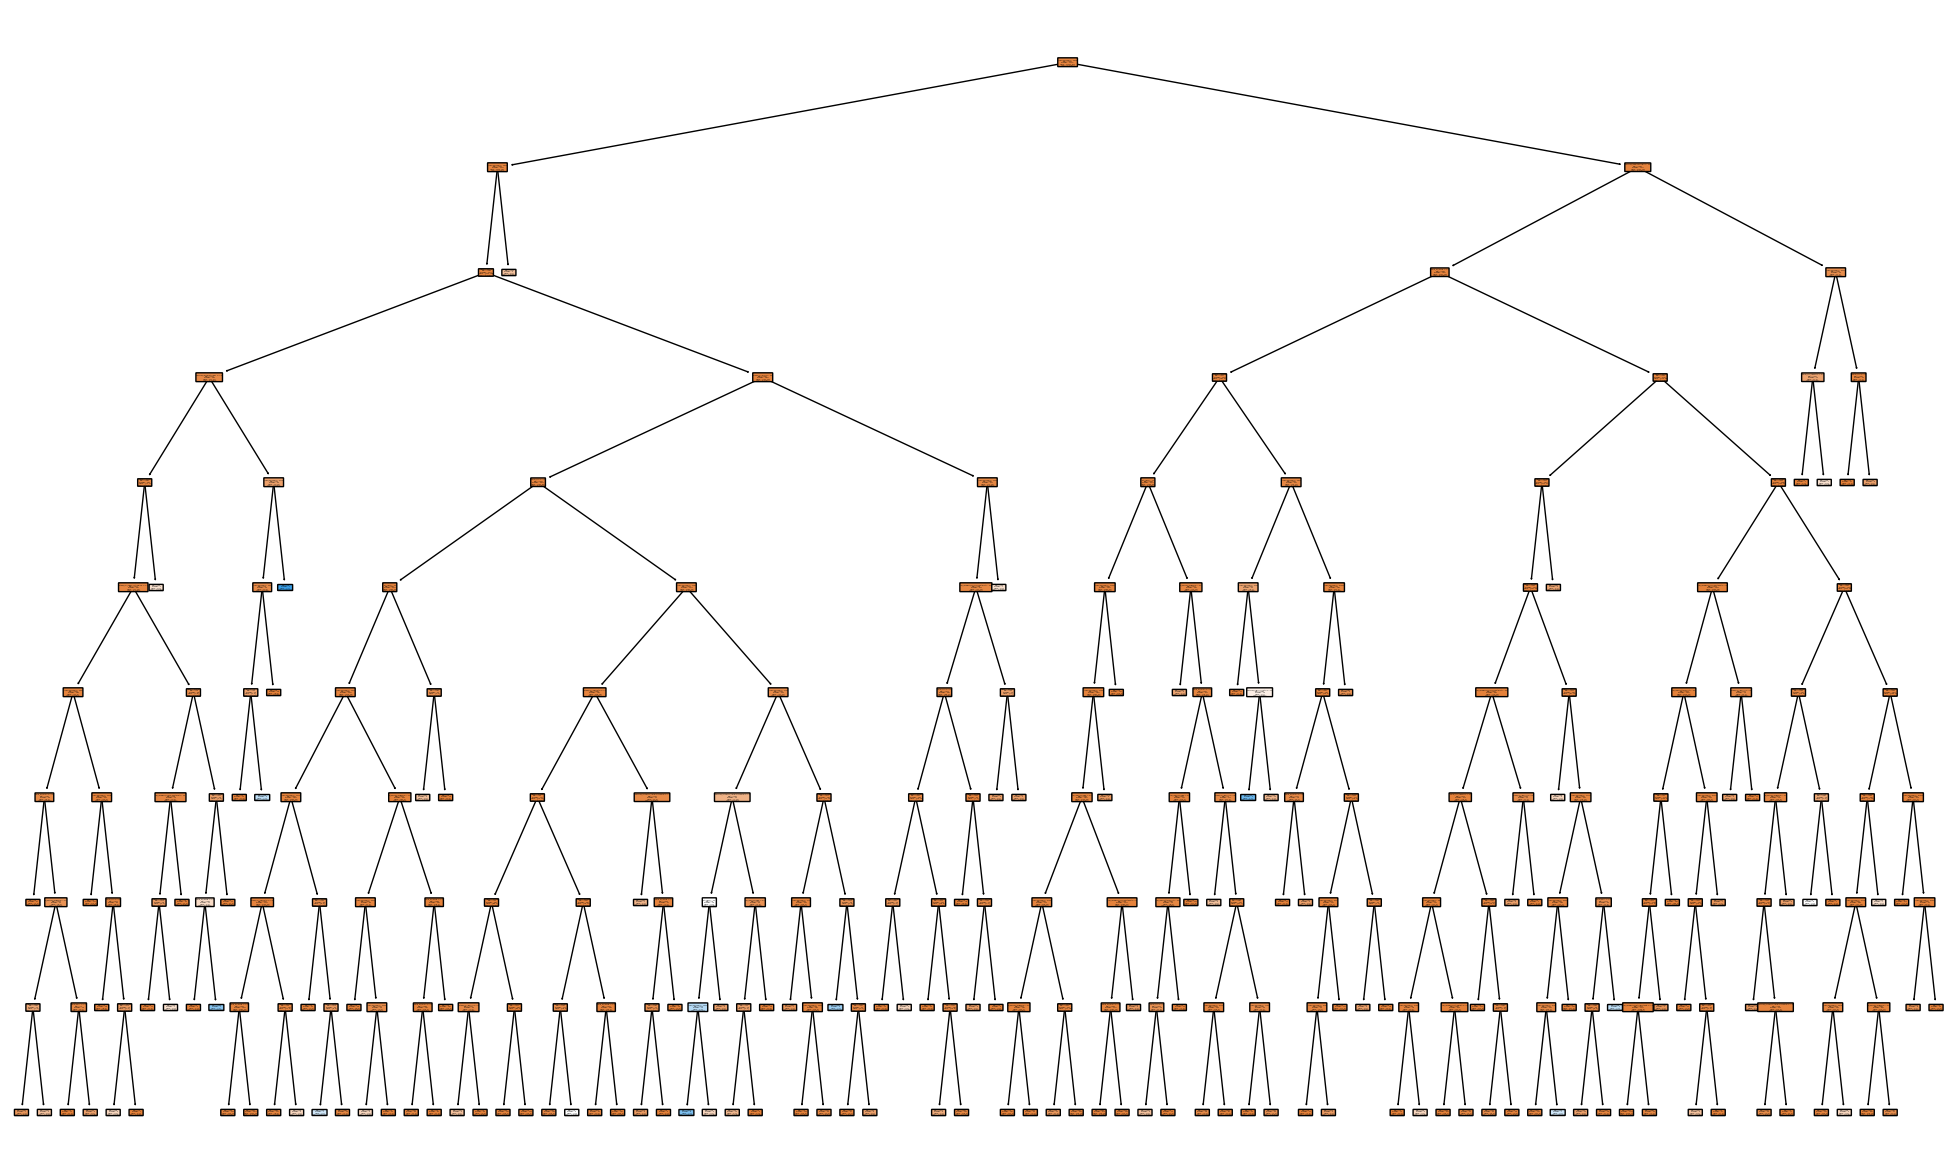

In [57]:
#plotando árvore para visualização
plt.figure(figsize=(25,15))
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=['Aprovados','Reprovados'],
          feature_names=X_train.columns)

In [58]:
#verificando acurácia
prediction = clf.predict(X_train)
accuracy_score(y_train,prediction)

0.9794079794079794

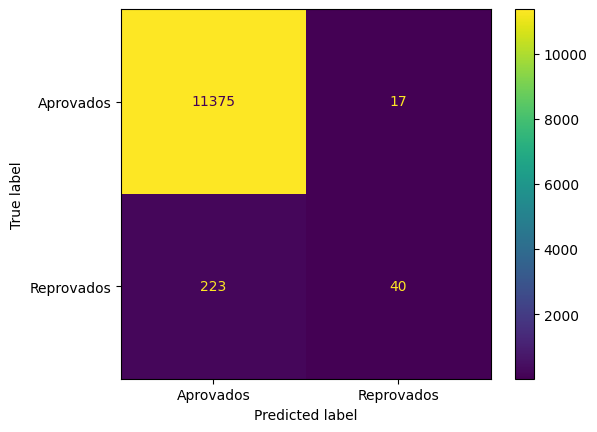

In [59]:
# matrix de confusão para observação da proporção
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados','Reprovados'])
disp.plot()

In [65]:
#verificando quantidade preditas de aprovados e reporvados
predicao  = clf.predict(X_train)

print(f'Aprovados pela prediçao:', list(predicao).count(0))
print(f'Reprovados pela predição:',list(predicao).count(1))

Aprovados pela prediçao: 11598
Reprovados pela predição: 57


In [66]:
#verificando  acurácia em quadro de todos os dados de mau fossem aprovados
y_train.loc[y_train == 1] = 0
predict  = clf.predict(X_train)
accuracy_score(y_train,predict)

0.9951093951093951